In [4]:
function multiplyit(a, g)
    return x -> a * g(x)  # function with `g` used in the closure
end

f(x) = x^2
h = multiplyit(3.0, f)    # use our quadratic, returns a new function which doubles the result
h(2)     # returned function is like any other function

12.0

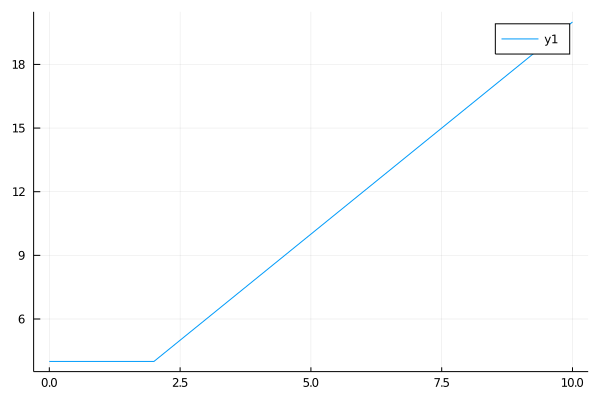

In [7]:
function snapabove(g, a)
    function f(x)
        if x > a         # "a" is captured in the closure f
            return g(x)
        else
            return g(a)
        end
    end
    return f    # closure with the embedded a
end

f(x) = 2x
h = snapabove(f, 2.0)

using Plots
gr(fmt=:png);
plot(h, 0.0:0.1:10.0)

In [28]:
# Exercise 1

# Part 1: compute inner product using zip()

A = [1 2 3]
B = [4 5 6]
@show sum(a * b for (a,b) ∈ zip(A,B))

# part 2: count even numbers between 0,99 using comprehension
@show even = sum(iseven, 1:99)

# part 3: count number of pairs where both elements are even using comprehension
A = [2 4 9 12]
B = [5 2 8 10]
@show sum( iseven(a)&&iseven(b) for (a,b) ∈ zip(A,B))

# or
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
@show sum(xy -> all(iseven, xy), pairs);



sum((a * b for (a, b) = zip(A, B))) = 32
even = sum(iseven, 1:99) = 49
sum((iseven(a) && iseven(b) for (a, b) = zip(A, B))) = 2
sum((xy->begin
            #= In[28]:18 =#
            all(iseven, xy)
        end), pairs) = 2


In [31]:
# Exercise 2

function p(x,coef)
    values = zeros(0)
    for (i, α) in enumerate(coef)
        val = α * x^(i-1)
        push!(values,val)
    end
    return sum(values)
end

coef = [12 0.5 3]
x = 2

@show sol = p(x,coef)

# or

p(x,coef) = sum( α * x^(i-1) for (i,α) in enumerate(coef))

@show sol2 = p(x,coef);


sol = p(x, coef) = 25.0
sol2 = p(x, coef) = 25.0


In [43]:
# Exercise 3

uppercase("foo") 

function countuppercase(string)
    count = 0
    for letter in string
        if letter == uppercase(letter) && isletter(letter)
            count += 1
        end
    end
    return count
end

@show sol = countuppercase("Romulus and Remus founded Rome")


# or

countuppercase(string) = sum( letter == uppercase(letter) && isletter(letter) for letter in string)

@show sol2 = countuppercase("Romulus and Remus founded Rome");
    

sol = countuppercase("Romulus and Remus founded Rome") = 3
sol2 = countuppercase("Romulus and Remus founded Rome") = 3


In [40]:
# Exercise 4

sameset(seq_a,seq_b) = all( a ∈ seq_b for a in seq_a )

A = ["apple" , 4, 2]
B = [2, "apple", 4]

sameset(A,B)


true

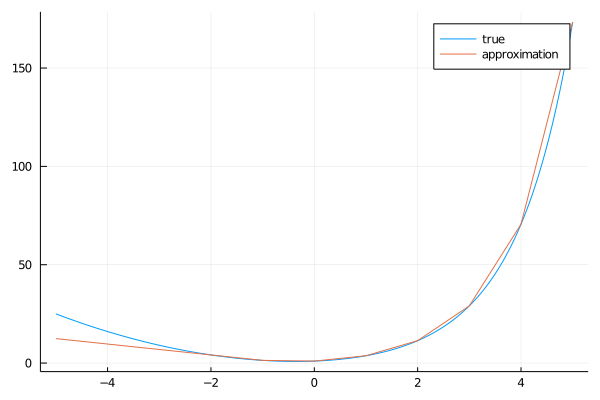

In [124]:
# Exercise 5 piecewise linear interpolation

function linapprox(f,a,b,n,x)
    
    interval_length = b-a # total length of interval
    
    no_subintervals = n-1 # number of subintervals = gridpoints - 1
    
    subinterval_length = interval_length/no_subintervals
    
    step = subinterval_length  
    
    # find grid point larger than x
    point = a
    while point < x
        point+= step
    end

    # x must lie between the gridpoints (point - step) and point
    u, v = point - step, point
    
    # computer interpolation polynomial
    return f(u) + (x-u) * (f(v)-f(u)) / (v-u)
end

f(x) = exp(x) + x^2
f_approx(x) = linapprox(f, -1, 1, 3, x)


x_grid = range(-5.0, 5.0, length = 400)
y_vals = f.(x_grid)
y = f_approx.(x_grid)
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation")



In [120]:
# Exercise 6

open("us_cities.txt", "w") do f
  write(f,
"new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229")
end

pop = open("us_cities.txt", "r")

total_pop =0 
for line in eachline(pop)
    city, population = split(line, ":")
    total_pop += parse(Int, population)
end

close(pop)
println("total population = $total_pop")

total population = 23831986
